# 单样本问题

## 广义符号检验



In [2]:
dat <- c(27.8, 27.8, 29.1, 32.2, 32.7, 32.7, 36.4, 36.5, 37.5, 37.7, 38.8, 41.9, 45.2, 45.8,
         46.0, 47.6, 48.2, 49.9, 51.8, 52.7, 54.9, 55.0, 55.3, 55.5, 58.2, 60.8, 62.7, 63.5,
         64.6, 65.3, 65.3, 65.3, 65.4, 66.2, 66.7, 67.7, 71.2, 71.7, 73.9, 74.3, 74.5, 76.2,
         76.6, 76.8, 77.7, 77.9, 79.1, 80.9, 81.0, 82.6, 85.7, 86.2, 86.4, 89.4, 89.5, 90.3,
         90.8, 91.8, 92.8, 95.2, 97.5, 98.2, 99.1, 99.3, 100.0, 100.6, 104.1, 104.6, 105.0, 109.4, 122.4)

In [3]:
mean(dat)

[1] 69.06197

In [4]:
sd(dat)

[1] 23.42362

In [5]:
median(dat)

[1] 67.7

In [6]:
length(dat)

[1] 71

In [7]:
pbinom(sum(dat<median(dat)),length(dat),0.5)

[1] 0.5

样本中位数要大于我们要检验的中位数赋值，所以单侧检验中的备择假设可以设为我们给定的数小于中位数参数或者说中位数参数要大于我们给定的数。
$$
H_0: Q_{0.5}=64 \\
H_1:Q_{0.5}>64
$$

回忆p值的意义，p值告诉我们更极端的区间的总概率，其实是指出如果以相等于p值的显著性水平来划分拒绝域（把更极端区间划为拒绝域），
我们刚好可以拒绝原假设。但由于更依附假设检验，我们往往使用0.01,0.05,0.1中比p值大中最小的那个数提出命题“以显著性水平XXX拒绝”，
其实是在说那个显著性水平划分的拒绝域要包含我们用p值划分的拒绝域，显然p值的点也落在那个拒绝域中，所以可以以那个显著性水平拒绝。
总之，也许Fisher当初p值是以极端概率本身的意义出发的，但我们用p值其实一直都是作为临时构造假设检验的一种方法，因为如果极端概率
或者说小似然概率有自然的定义的话，它则自然暗示一个自然的拒绝域划分。

对于单侧检验来说，我们把拒绝域放在单边还是两边不影响原假设空间的势函数值，那么使得我们把它放在单边的原因其实是拒绝域上的势函数
值总比双边式拒绝域要大。若设检验统计量为那种参数直接加噪声那种同空间情况，我们想检验参数是否大于某个数，则拒绝域中除逼近原假设
的极限过程中的点势在两种拒绝域中的差别趋近于0以外，所有点都有势的差别。那么这个一致更优的检验当然会被我们所选择。

对于上例，$Q_{0.5}$是分布的一个参数，我们在检验这个参数。之所以我们还能把它叫做非参数检验，是因为所有分布都有这个参数。而其他
被叫做参数的东西，甚至普遍如一阶矩，都会发现有柯西分布这种恶心的分布会没有这个参数。

既然备择假设空间是$Q_{0.5}>64$，那么也许有$Q_{0.5}=65$之类的...且慢，$Q_{0.5}=65$又意味着什么呢？在不引入总体分布的情况下，我们
又怎么知道这个$1$的差别带来了(背后分布的参数的)什么变化呢？毕竟，我们要知道背后分布被分位数设定确定成什么样了，才能知道检验统计量
——“小于64的数量”的分布，才能根据之前distribution-free 的原假设划分出的拒绝域算出此时的势函数的值。

但也许我们并不需要势函数的确切值，显然，如果$Q_{0.5}>64$，则“小于64的数量”这一检验统计量相对$Q_{0.5}=64$有变小的趋势
（也许可以形式的描述为在所有逆分布函数或分位数函数上，前者的函数值要小于后者的函数值）。所以为了在拒绝域有更大的势，我们就应该
把拒绝域设到偏小的那个区间上。对这个问题而言，我们只需要求出小于64的数量的默认的左扫尾概率，即p值即可。然后可以用上面的方法
利用p值临时构造拒绝域。

In [8]:
pbinom(sum(dat<64),length(dat),0.5)

[1] 0.04796182

对于检验

$$
H_0: Q_{0.25} = 64 \\
H_1: Q_{0.25} < 64
$$

检验统计量指定为大于64的数量，备择假设空间有$Q_{0.25}=63$之类的点，这使所有背后总体左移，从而使检验统计量分布偏小。于是我们可以指定
拒绝域为较小/偏左的区间。来使得统计量在假设参数在备择假设空间上时在拒绝域上有较大的概率，即较大的势。

In [9]:
pbinom(sum(dat>64),length(dat),0.75)

[1] 0.005151879

也可以继续使用小于64的数量为检验统计量，此时背后分布左移使得检验统计量偏大，所以我们应该把拒绝域划到靠右那一边。
看小于64数量在原假设下的右扫尾概率。

In [10]:
pbinom(sum(dat<64)-1,length(dat),0.25,lower.tail=FALSE)

[1] 0.005151879

### 反转置信区间

虽然一般是先确定假设空间划分后再选择检验统计量，划分统计量拒绝域，还可以搞出好几个检验统计量比较它们的功效。
但反转置信区间方法却保持检验统计量不变，而去修改假设空间划分（主要修改简单原假设的赋值）。看检验统计量的实现值在
这不同的假设下的p值。然后选择一个阈值，高于此阈值的点构成的区间即由此假设检验反转出的置信区间。

我们可以先看如何反转出自正态分布样本的样本均值的假设检验，这个假设检验本身是利用样本均值统计量去检验参数是否为某一特值，
即此参数设定下是否出现该样本均值统计量很不合理。我们试图找出那些“还算合理”的点组成置信区间。

$$
X \sim N(\mu,\sigma^2) \\
\bar{X} \sim N(\mu,\frac{\sigma^2}{n}) \\
\frac{\bar{x} - \mu}{\sigma/\sqrt{n}} \sim N(0,1)
$$

于是可以划分出“还能”接受域

$$
\Phi^{-1}(\alpha/2) < \frac{\bar{x} - \mu}{\sigma/\sqrt{n}} < \Phi^{-1}(1-\alpha/2) \\
-\Phi^{-1}(\alpha/2) \frac{\sigma}{\sqrt{n}} < \bar{x} - \mu < \Phi^{-1}(\alpha/2) \frac{\sigma}{\sqrt{n}} \\
\bar{x} -\Phi^{-1}(\alpha/2) \frac{\sigma}{\sqrt{n}} < \mu < \bar{x} + \Phi^{-1}(\alpha/2) \frac{\sigma}{\sqrt{n}}
$$

这和枢轴量法好像没什么区别。用更明显的反转角度看，不妨考虑设定在检验统计量左边的参数赋值，若使用双侧检验，参数在向左滑动时
将在看检验统计量到$\alpha/2$时达到阈值，以此为界右边到检验统计量的值是置信区间的左半部分。因为方差恒定，该分界点从参数设定为
检验统计量所在点往左看的左扫尾概率是一样的。所以我们只需要求出$K$，使得

$$
T \sim N(\bar{X},\sigma^2/n) \\
P(T<K) = \alpha/2
$$

此时$\bar{x}$值已知。

$$
P( \frac{T - \bar{x}}{\sigma/\sqrt{n}} < \frac{K - \bar{x}}{\sigma/\sqrt{n}} ) = \alpha/2 = \Phi( \frac{K - \bar{x}}{\sigma/\sqrt{n}} ) \\
\Phi^{-1}(\alpha/2) = \frac{K - \bar{x}}{\sigma/\sqrt{n}} \\
K = \Phi^{-1}(\alpha/2)\frac{\sigma}{\sqrt{n}} + \bar{x} = \bar{x} - \Phi^{-1}(1-\alpha/2)\frac{\sigma}{\sqrt{n}}
$$

这正是我们要证明的。

对于广义符号检验来说，我们却采用不同的假设时同时修改检验统计量，如设$Q_{0.5} = 10$时，检验统计量也同时改为“小于10的数量”，
这样我们可以让各个假设下的分布相同。这个分布只取决于我们要检验的“q分位数”的q值。

这看起来不太自然，似乎本来也可以不修改检验统计量，毕竟q分位数这些假设不同时，同一个检验统计量分布会改变，
那么相同的检验统计量值就自然可以获得不同的p值。而按上面方法，我们却在不断修改检验统计量的值（在样本相同情况下修改检验统计量的算法）
，然后保持在同一个分布内算出不同p值。这当然是因为非参数检验只有指定了分布才能用那个“自然的”方法，而我们就是要作出distribution-free的区间，
当然也许可以证明在任意指定分布下都可以得到一样的区间，不过考虑到反推区间本身与统计量有关（越有效的统计量区间越小），这似乎不太可能。
“自然”的方法也是推出势函数的方法，所以势函数必须有指定分布。有时错把“不自然方法”当成推出势函数的方法就会陷入思维混乱中不能自拔。

无论如何，这种不自然反推法中我们可以专门指定各个样本中出现过的数去测试其是否“过于极端”，因为那些数之间的数是否算入区间中显然还是
由两边的出现过的数所决定。具体来说，可以先把样本排序，然后按设定的q值直接以序号求出包含的两边。

In [11]:
binom.interval <- function(dat,q,alpha){
    sort.dat <- sort(dat)
    n <- length(dat)
    left <- 0
    repeat{
        if(pbinom(left,n,q) > alpha/2)
            break
        left <- left + 1
    }
    right <- left
    repeat{
        if(pbinom(right,n,q) > 1-alpha/2)
            break
        right <- right + 1
    }
    #return(c(sort.dat[left],sort.dat[right+1])) # interval tend to big
    return(c(sort.dat[left],sort.dat[right+1])) # interval tend to shrink
}

In [12]:
binom.interval(dat,0.5,0.05)

[1] 62.7 77.7

In [13]:
binom.interval(dat,0.25,0.05)

[1] 38.8 60.8

In [14]:
dat2 <- c(1.00, 1.35, 1.99, 2.05, 2.06, 2.10, 2.30, 2.61, 2.86, 2.95, 2.98, 3.23, 3.73, 4.03, 4.82, 5.24,
          6.10, 6.64, 6.81, 6.86, 7.11, 9.00)

In [15]:
binom.interval(dat2,0.25,0.05)

[1] 1.35 2.98

## Wilcoxon 符号秩检验

Wilcoxon统计量基本出自这么一个思想，如果两个总体同分布（这两个总体可以是从一个总体里拉出来的，同分布性也可能是经过某种变换后的），
则把它们混起来得到的求出的两个秩和应该同分布，而如果两者有位置上的差别，则会体现为倾向于出现相差很大的秩和观测值或者绝对值很大的
秩和的差。检验秩和更小的那个是否过于偏离假设更常用，秩和差法无法自然地扩展到多总体上。假设成立（两总体相同）时单总体所获秩和服从
的分布就是 Wilcoxon分布。

我们先随便看看模拟出的wilcoxon分布是什么样的。下面进行1000次试验，每次试验生成A，B两服从标准正态分布的总体各100个数。
记录A的各次秩和实现值

In [16]:
rank.sum <- c()

for(i in 1:1000){
    A <- rnorm(100)
    B <- rnorm(100)
    rs <- sum(rank(c(A,B))[1:100])
    rank.sum <- c(rank.sum,rs)
}

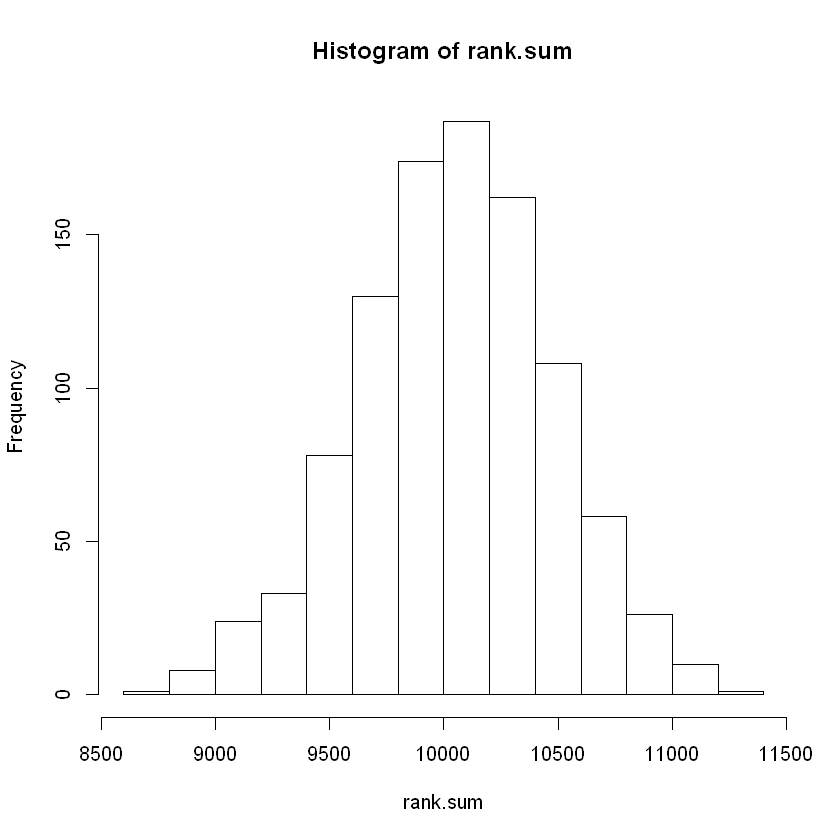

In [17]:
hist(rank.sum)

In [18]:
# if not equal?
rank.sum <- c() 

for(i in 1:1000){
    A <- rnorm(100)
    B <- rnorm(100,1,1)
    rs <- sum(rank(c(A,B))[1:100])
    rank.sum <- c(rank.sum,rs)
}

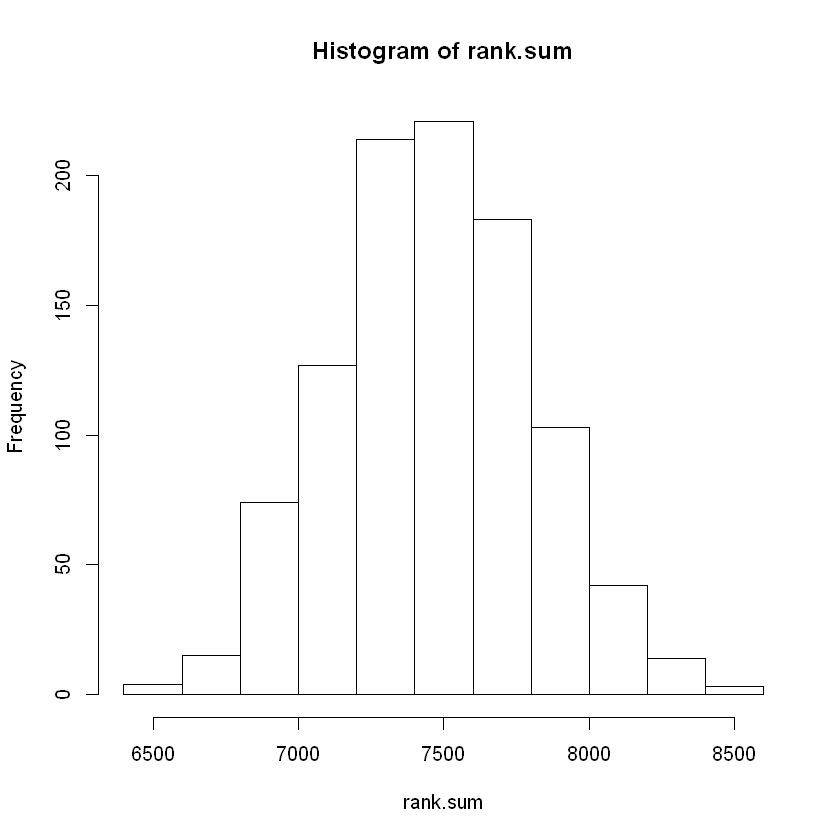

In [19]:
hist(rank.sum)

In [20]:
rank.sum <- c() 

for(i in 1:1000){
    A <- runif(100)
    B <- runif(100)
    rs <- sum(rank(c(A,B))[1:100])
    rank.sum <- c(rank.sum,rs)
}

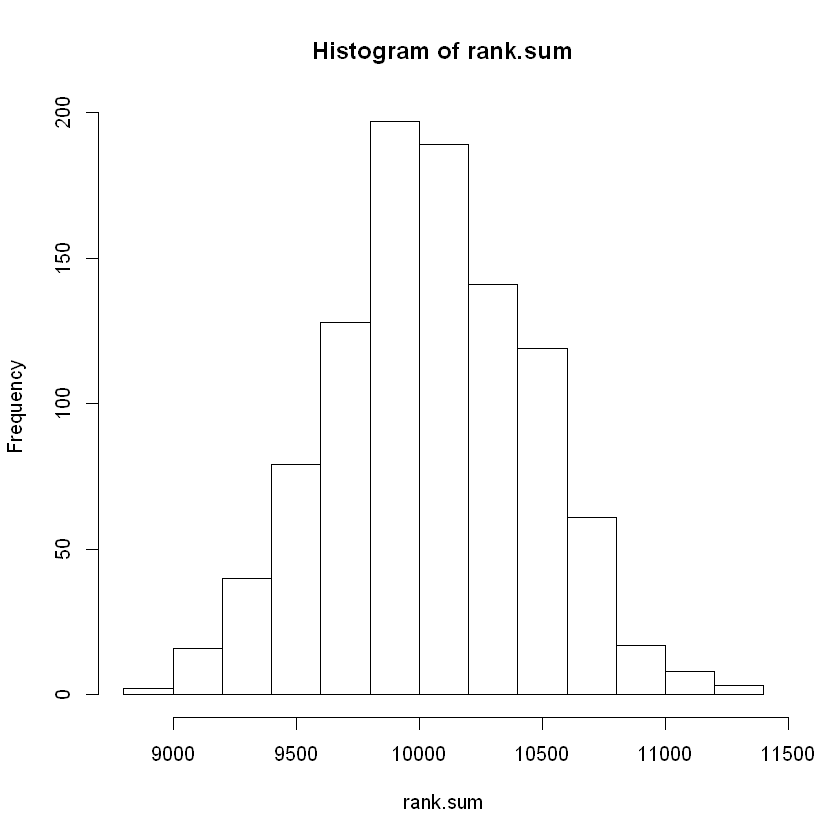

In [21]:
hist(rank.sum)

从上例可以看到对同总体时对分布不变性以及分布一旦改变就发生复杂变化的情况。以此可以构造一系列基于Wilcoxon统计量的检验

### 符号秩检验

我们想要检验一个出自对称总体的中位数是否为给定值。于是，假设成立时按落在那个值左右可以划分两个总体，且由对称性，
它们对中位数的绝对差随机变量是同分布的。于是它们中的任一个的秩和就服从wilcox分布。归约成了上述一般问题。

然而我们后面可以发现这种想法只能推出一种功效比较低的检验，真正的符号秩检验用了更多的信息。

In [2]:
EuroAlc <- c(4.12, 5.81, 7.63, 9.74, 10.39, 11.92, 12.32, 12.89, 13.54, 14.45)

检验

$$
H_0:M=8 \\
H_1:M>8
$$

In [3]:

rs <- sum((rank(abs(EuroAlc - 8)))[EuroAlc < 8])
rs

[1] 9

In [4]:
sum(rank(EuroAlc))

[1] 55

In [5]:
left <- (EuroAlc - 8) < 0
right <- (EuroAlc - 8) > 0
list(left,right,sum(left),sum(right))

[[1]]
 [1]  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

[[2]]
 [1] FALSE FALSE FALSE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE

[[3]]
[1] 3

[[4]]
[1] 7

In [6]:
left.rank <- sum(rank(abs(EuroAlc - 8))[left])
right.rank <- sum(rank(abs(EuroAlc-8))[right])
list(left.rank,right.rank)

[[1]]
[1] 9

[[2]]
[1] 46

In [7]:
pwilcox(9,3,7) # False! pwilcox's first parameter is W_XY or W_YX not the W_X or W_Y

[1] 0.4166667

In [8]:
EuroAlc[left]

[1] 4.12 5.81 7.63

In [9]:
EuroAlc[right]

[1]  9.74 10.39 11.92 12.32 12.89 13.54 14.45

In [10]:
sum(outer(abs(EuroAlc[left] - 8),abs(EuroAlc[right] - 8),'-')>0)

[1] 3

In [12]:
pwilcox(3,3,7)

[1] 0.05833333

In [28]:
wilcox.test(EuroAlc-8,alt="greater")


	Wilcoxon signed rank test

data:  EuroAlc - 8
V = 46, p-value = 0.03223
alternative hypothesis: true location is greater than 0


In [29]:
psignrank(9,10)

[1] 0.03222656

In [30]:
pbinom(3,10,0.5)


[1] 0.171875

我们应当注意到符号秩检验实际使用了两个信息，符号检验的二分类信息和分类内部的秩的信息。这使我们获得了0.03的p值
而如果只使用符号检验，将只能获得0.17，而如果使用丢掉发生这种分类数量对比的原因的信息，把出现3,7看成出自两个独立总体，那么光通过秩信息
只能获得0.058的p值（这个检验方法是后面的双样本位置检验的方法，只能说势比较低，并不是说无效）。

符号秩为了同时利用两个信息，用了一些trick，即不按一般方法看成两个总体而看成一个总体（当然实际也是一个总体），
那么在假设下我们实际可以转而以秩如何分配而不是组合如何得到秩来思考。显然，各秩如何分配到两组是互相独立的，我们可以求出$2^n$个组合，
每个组合概率一样，而它们在一组的秩和就向那个秩和在分布列中贡献一份概率$1/2^n$。这与双总体情况是不一样的，在那里秩如何分配显然受到
两组的样本规模有关。

### 符号秩统计量的正态近似

$$
E(W) = \frac{n(n+1)}{4} \\
Var(W) = \frac{n(n+1)(2n+1)}{24} \\
Z = \frac{W - n(n+1)/4}{\sqrt{n(n+1)(2n+1)/24}} \to N(0,1)
$$

In [31]:
n <- 10
W <- 9
pnorm((W - n*(n+1)/4)/sqrt(n*(n+1)*(2*n+1)/24))

[1] 0.02966806

Anyway, 近似本身并不保证总是保守或者激进之类的性质。

### Walsh平均与区间估计


In [32]:
mat <- outer(EuroAlc,EuroAlc,'+')/2
mat

4.120,4.965,5.875,6.930,7.255,8.020,8.220,8.505,8.830,9.285
4.965,5.810,6.720,7.775,8.100,8.865,9.065,9.350,9.675,10.130
5.875,6.720,7.630,8.685,9.010,9.775,9.975,10.260,10.585,11.040
6.930,7.775,8.685,9.740,10.065,10.830,11.030,11.315,11.640,12.095
7.255,8.100,9.010,10.065,10.390,11.155,11.355,11.640,11.965,12.420
8.020,8.865,9.775,10.830,11.155,11.920,12.120,12.405,12.730,13.185
8.220,9.065,9.975,11.030,11.355,12.120,12.320,12.605,12.930,13.385
8.505,9.350,10.260,11.315,11.640,12.405,12.605,12.890,13.215,13.670
8.830,9.675,10.585,11.640,11.965,12.730,12.930,13.215,13.540,13.995
9.285,10.130,11.040,12.095,12.420,13.185,13.385,13.670,13.995,14.450


In [63]:
# wals average didn't get same result twice. We take triangle part only.
wal <- c()
for(i in 1:10){
    for(j in i:10){
        wal <- c(wal, (EuroAlc[i]+EuroAlc[j])/2 )
    }
}
wal <- sort(wal)
wal

[1]  4.120  4.965  5.810  5.875  6.720  6.930  7.255  7.630  7.775  8.020
[11]  8.100  8.220  8.505  8.685  8.830  8.865  9.010  9.065  9.285  9.350
[21]  9.675  9.740  9.775  9.975 10.065 10.130 10.260 10.390 10.585 10.830
[31] 11.030 11.040 11.155 11.315 11.355 11.640 11.640 11.920 11.965 12.095
[41] 12.120 12.320 12.405 12.420 12.605 12.730 12.890 12.930 13.185 13.215
[51] 13.385 13.540 13.670 13.995 14.450

In [64]:
median(wal)

[1] 10.39

In [65]:
sort(wal)[length(wal)/2]

[1] 10.26

In [66]:
sort(wal)[length(wal)/2+1]

[1] 10.39

In [67]:
median(EuroAlc)

[1] 11.155

In [68]:
walsh <- function(dat){
    return(as.vector(outer(dat,dat,'+')/2))
}

median(EuroAlc)
median(walsh(EuroAlc))
median(walsh(walsh(EuroAlc)))
# median(walsh(walsh(walsh(EuroAlc)))) I can't expect the size cost in memory. Right, it's obvious.

[1] 11.155

[1] 10.325

[1] 10.375

直接在Wilcoxon秩和统计量（signrank）上套用符号检验的方法反推置信区间有一些问题，不妨假想我们在从中间往左滑动，
每次都同时修改假设的中位数和检验统计量，如此我们就可以获得同分布但不同的检验统计量的实现值，以及不同的左扫尾p值。
然而每一步中，统计量可能以跳过几个整数的方式移动，因为检验统计量的值每次变化是因为一个数加入或退出所指定的集合，
这个数对统计量一次性加上它自己的绝对差秩数，该数一般不等于1。这与符号检验情况不同，
符号检验中检验统计量变化也因为数的加入或退出，但每次只变1.但是始终如一的那个signrank分布的拒绝域却明确指定在两个特定的整数点上，
如果按离那两个整数点最近的可选点（用游历各个样本数值能得到的点）之类的原则定出数值置信区间的话，相比符号检验的+-1式误差。
未免太大了一些。

比如在EuroAlc例中，我们有10个数，故两组的秩和统计量单独来看的取值范围都是1到55。用`qsignrank`算出的接受域是[9,46]。但是既然一共只有
10个数，我们实际只能取55个数中10个数作为分界点，然后从分界点中选出两个构成作为[9,46]的近似，再得到这两个分界点对应数值构成的数值区间。
这看起来简直有比符号检验还大的误差。

我们照这个做法试一下

In [40]:
EuroAlc

[1]  4.12  5.81  7.63  9.74 10.39 11.92 12.32 12.89 13.54 14.45

In [42]:
qsignrank(0.025,10)

[1] 9

In [44]:
qsignrank(0.975,10)

[1] 46

In [47]:
avaiable <- c()
for(M in EuroAlc){
    avaiable <- c(avaiable,sum(rank(abs(EuroAlc - M))[EuroAlc<M]))
}
avaiable

[1]  0  2  7 21 27 37 41 46 51 54

In [50]:
EuroAlc[avaiable == 7]

[1] 7.63

In [51]:
EuroAlc[avaiable == 46]

[1] 12.89

很幸运，46刚好可以取到，这里我们直接无视了+-1式细节问题。但9却只能取隔了两个整数的7对应的12.89.可以设想也许这个差距可能更大。
缓解这个问题的方式之一就是利用上面的walsh平均。并不是直接在walsh平均上重跑一边这个流程更细粒化的区间。当然我们可以试一试那样会得到什么。

In [69]:
walshed <- wal #sort(wal) `sort` is not required after some defination modify.
walshed

[1]  4.120  4.965  5.810  5.875  6.720  6.930  7.255  7.630  7.775  8.020
[11]  8.100  8.220  8.505  8.685  8.830  8.865  9.010  9.065  9.285  9.350
[21]  9.675  9.740  9.775  9.975 10.065 10.130 10.260 10.390 10.585 10.830
[31] 11.030 11.040 11.155 11.315 11.355 11.640 11.640 11.920 11.965 12.095
[41] 12.120 12.320 12.405 12.420 12.605 12.730 12.890 12.930 13.185 13.215
[51] 13.385 13.540 13.670 13.995 14.450

In [70]:
ava <- c()
for(M in walshed){
    ava <- c(ava,sum(rank(abs(walshed - M))[walshed < M]))
}

In [71]:
ava

[1]    0.0    2.5   10.0   13.5   39.5   52.0   76.0  112.0  128.0  160.0
[11]  171.0  189.0  243.0  280.0  308.0  315.0  355.0  368.0  422.5  445.0
[21]  536.0  561.0  571.0  631.0  658.0  682.5  728.0  767.0  836.5  920.5
[31]  989.0  993.0 1036.0 1086.0 1105.5 1184.5 1184.5 1263.0 1269.5 1298.0
[41] 1307.0 1354.0 1368.0 1375.5 1409.5 1429.0 1455.0 1463.5 1490.0 1497.5
[51] 1510.5 1521.0 1526.5 1535.5 1539.0

In [72]:
list(qsignrank(0.025,55),qsignrank(0.975,55))

[[1]]
[1] 537

[[2]]
[1] 1003

In [73]:
list(walshed[ava == 536],walshed[ava == 993][1])

[[1]]
[1] 9.675

[[2]]
[1] 11.04

似乎有点过于收敛了，应该如此吗。看起来并不好分析，也许这种方法会带来比较复杂的情况。既然我们求出的walsh平均后数据数量和检验统计量
可取值数一样都是55，我们就怀疑它们之间是不是可以建立一一对应关系。

In [78]:
wal[avaiable+1]

[1]  4.12  5.81  7.63  9.74 10.39 11.92 12.32 12.89 13.54 14.45

In [79]:
wal[avaiable+1] == EuroAlc

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

我们令人瞩目的发现了walsh平均的不变量。指定检验统计量的分界量为各个原数据点得到统计量值，其作为下标在排过序的walsh平均数列中
恰好就是这些原数据点的值本身！形式化地

$$
idx = \sum_{i=1}^n r(X_i)I(X_i<M) \\
W_{(idx)} = X_i
$$

其中$W_{i}$是原数据walsh平均的排序统计量（排过序的数列）。$r(X_i)$指数据$X_i$在样本中对$M$的绝对离差的秩。

证明它的方式看起来是纯组合的，姑且先考虑这个性质的意义。首先，这意味着如果我们依然只使用那55个中的10个统计量构成的近似区间，
本来我们是直接利用10个数据点与那10个检验统计量取值的一一对应关系取得对应数据的，
但现在我们转而使用walsh平均排序数列与55个（全部）检验统计量取值的一一对应。那么我们可以得到一致的结果。
看起来这似乎是通过把10个映射“推广”到55个来更精细取值的一个必须的性质。
看起来必须的第二个性质是原10个统计量相邻两个取值之间那些取值对应的新数据点应该是单调的，如此就能保证整个映射的单调性由10个保持到了55个
，而这一点由walsh排序数列排序过是显然的。

这两个性质的满足使得它看起来是可以接受的插值。也许它还有我们还没发现更好的性质，比如容易概率分析，但那已经不重要了。前面那种直接在
walsh平均上重跑定区间算法上已经在特例上显示出其违反了第二条性质，并不靠谱。也许直接邻点间等距插值再重跑而不是walsh平均再重跑好要好一些。
但这里就不过多分析了。

## 正态记分检验

将秩和统计量一般化时，会看成秩经过一个非负单调函数起作用。如符号检验可以看成常数（1）函数。符号秩可以看成恒等映射。这个函数称作
*记分*，显然不同的记分产生不同的分布。还有一种常用记分就是标准正态逆分布函数和一个线性函数的组合。

$$
a_n(i) = \Phi^{-1} \left[ \frac{1}{2}\left(1+\frac{i}{n+1}\right) \right]
$$

它可以用来构造一个渐进正态分布的统计量$S_n$

$$
s_n = a_n(R_i)sign(X_i-M_0) \\
S_n = \sum_{i}^n s_n 
$$

其中。然后由线性秩统计量的一般结论，有

$$
T = \frac{S_n - E(S_n)}{\sqrt{Var(S_n)}} = \frac{S_n}{\sum_{i=1}^n s_i^2} \sim N(0,1)
$$

In [71]:
norm.score <- function(i,n){
    return(qnorm(0.5*(1+i/(n+1))))
}



In [ ]:
s_n <- norm.score(rank(abs(EuroAlc - 8)),length(EuroAlc)) * sign(EuroAlc - 8)
s_n

In [85]:
S_n <- sum(s_n)
T <- S_n/sqrt(sum(s_n^2))
T

[1] 1.913559

In [86]:
pnorm(T,lower.tail=FALSE)

[1] 0.02783824

为什么这样记分可以产生渐进正态分布呢？首先我们知道通过逆分布函数生成随机数的方法就是在一个均匀分布上随机变量上做逆分布函数变换。
照这个思路，把秩经过
$$
\frac{i}{n+1}
$$
变换可以得到一个非常“均匀”，无序的看根本没有任何随机性的集合，把它们经过逆分布函数加起来也一样没有随机性。
对应的，如果取代每个秩位置的是独立均匀分布随机变量，经过逆分布函数加起来后依然是正态分布，而且直接就是不需要渐进。

那么如果随机指定每个秩的符号呢？比如，不采用秩而采用一些独立的0,1随机变量。我们当然可以由二项分布对正态分布的渐进性得到此性质。
-1,1容易转化为0,1，这相当于一些值为1的数乘以-1,1随机变量.而一列数1,2,3,4,...以乘上-1,1随机变量看上去应该也趋近正态分布，
我们来试验一下。

In [2]:
rbinom(100,1,0.5) * 2 -1

[1]  1  1 -1  1 -1  1  1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1  1  1  1
 [26]  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1  1 -1 -1 -1  1  1  1  1  1 -1 -1 -1
 [51]  1  1 -1 -1  1 -1  1 -1  1  1  1  1 -1 -1 -1  1  1 -1  1 -1  1  1 -1  1  1
 [76] -1 -1  1  1  1  1  1 -1  1 -1  1  1  1  1 -1  1  1  1  1 -1  1  1  1 -1 -1

In [3]:
random.sign <- function(n){
    sign <- rbinom(n,1,0.5) * 2 - 1
    return(1:n * sign)
}

random.sign(20)

[1]   1   2  -3   4   5   6  -7   8   9  10  11 -12  13  14 -15 -16 -17  18  19
[20]  20

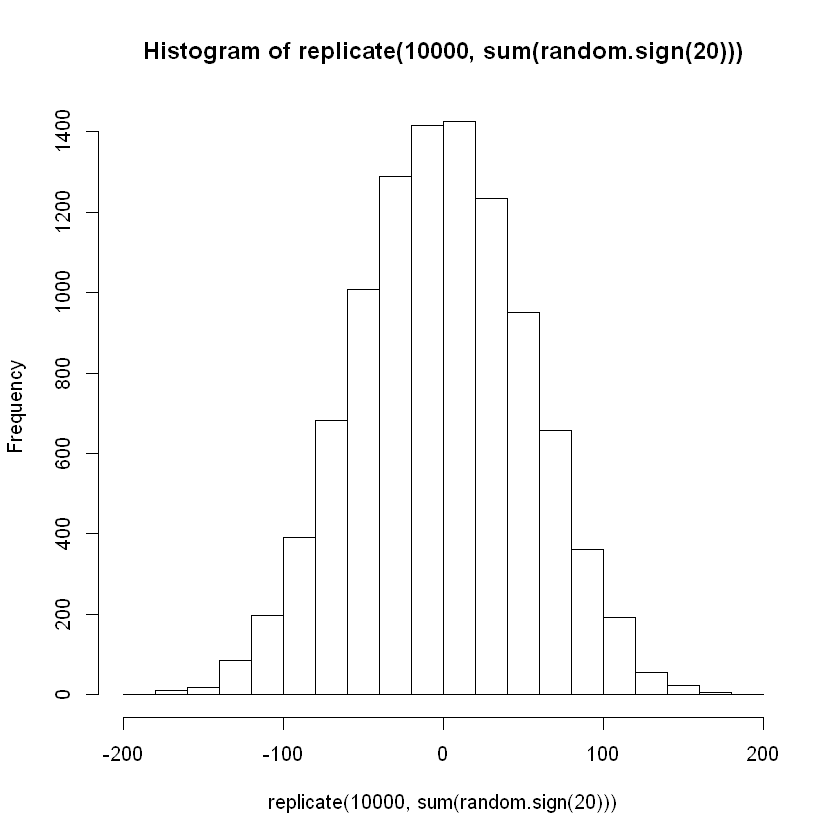

In [8]:
hist(replicate(10000,sum(random.sign(20))))

这样搞的确可以也产生渐进正态分布。但正态记分真正的处理方式是把1,...,n映射到[1/2,1)区间。做一个逆分布函数变换后加随机-1,+1符号
如果不经那个线性映射+逆分布函数变换或看成做了恒等变换那就是上面的处理方式。逆分布函数好像只是挤压了一下1,...,n的“权重”。是一种介于
二项分布式收敛和1,2,3...,n加权收敛的加权方式。那么这样一种非线性加权有什么额外的好处吗？它收敛的更快吗？它直接就是正态分布吗？



In [21]:
res <- shapiro.test(replicate(100,sum(random.sign(20))))
res


	Shapiro-Wilk normality test

data:  replicate(100, sum(random.sign(20)))
W = 0.98768, p-value = 0.4847


In [22]:
res$p.value

[1] 0.4846835

In [82]:
p.values <- replicate(100,shapiro.test(replicate(100,sum(random.sign(20))))$p.value)
list(mean=mean(p.values),sd=sd(p.values))

$mean
[1] 0.5091854

$sd
[1] 0.2832369

In [50]:
random.sign2 <- function(n){
    sign <- rbinom(n,1,0.5) * 2 - 1
    return(rep(1,n) * sign)
}


In [81]:
p.values <- replicate(100,shapiro.test(replicate(100,sum(random.sign2(20))))$p.value)
list(mean=mean(p.values),sd=sd(p.values))

$mean
[1] 0.03863031

$sd
[1] 0.03743587

In [74]:
random.sign3 <- function(n){
    sign <- rbinom(n,1,0.5) * 2 - 1
    return(norm.score(1:n,n) * sign)
}


In [85]:
p.values <- replicate(100,shapiro.test(replicate(100,sum(random.sign3(20))))$p.value)
list(mean=mean(p.values),sd=sd(p.values))

$mean
[1] 0.5064665

$sd
[1] 0.2790077

In [88]:
# p.values <- replicate(10000,shapiro.test(replicate(100,sum(random.sign3(20))))$p.value)
# list(mean=mean(p.values),sd=sd(p.values))
#
# $mean
# 0.498628152028582
# $sd
# 0.27997024256889

In [89]:
# p.values <- replicate(10000,shapiro.test(replicate(100,sum(random.sign(20))))$p.value)
# list(mean=mean(p.values),sd=sd(p.values))
#
# $mean
# 0.498006707132392
# $sd
# 0.280210459193869


虽然不知道如何理论推导，但正态记分似乎的确比直接用秩去渐进好一丁点，比二项渐进不知道高的哪里去了。

## Cox-Stuart 趋势检验



In [87]:
TJAir <- c(54379, 45461, 55408, 59712, 60776, 57635, 63335, 71296, 70250, 76866, 75561, 66427,
           61330, 58186, 67799, 76360, 86207, 75509, 83020, 89614, 75791, 80835, 72179, 61520,
           66726, 60629, 68549, 73310, 80719, 67759, 70352, 82825, 70541, 74631, 68938, 53318,
           62653, 58578, 63292, 69536, 73379, 62859, 72873, 87260, 67559, 76647, 70590, 58935,
           58161, 64057, 63051, 58807, 63663, 57367, 70854, 79949, 66992, 80140, 62260, 55942,
           58367, 56673, 61039, 74958, 85859, 67263, 87183, 97575, 79988, 88501, 68600, 58442,
           68955, 56835, 67021, 81547, 85118, 70145, 95080, 106186,86103, 88548, 70090, 65550,
           69223, 85138, 89799, 99513, 98114, 68172, 97366, 116820,95665, 109881,87068, 75362,
           88268, 85183, 87909, 79976, 27687, 50178, 100878,131788,116293,120770,104958,109603)

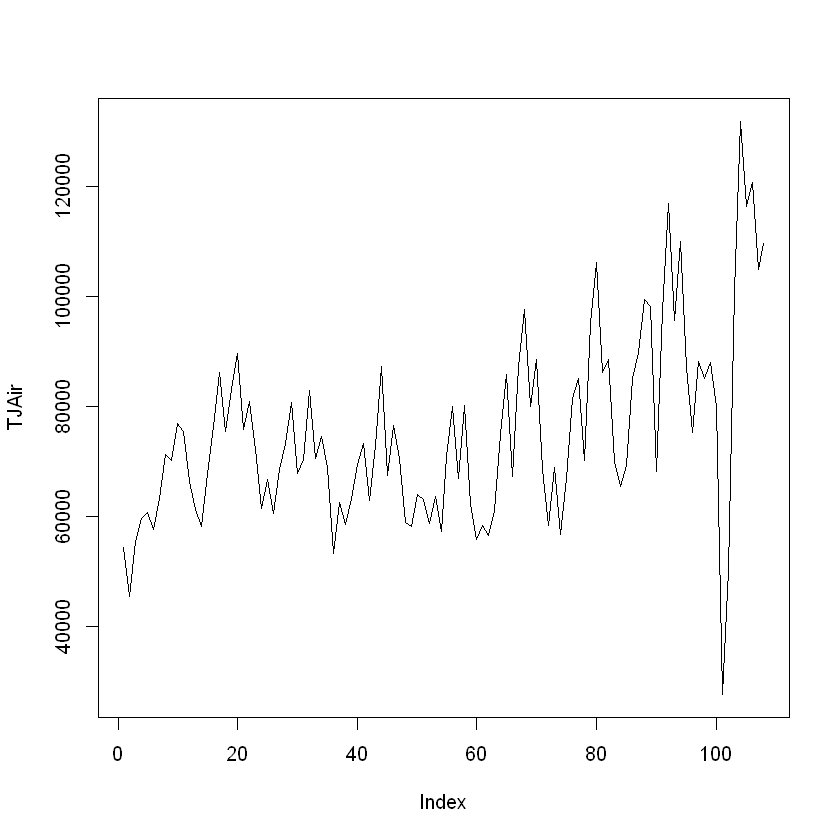

In [89]:
plot(TJAir,type="l")

想要考察上面的时间序列是否有周期性，一种方式是直接线性回归它。

In [93]:
df = data.frame(y=TJAir,x=1:108)

In [98]:
res <- lm(y~x,data=df)
summary(res)


Call:
lm(formula = y ~ x, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-60199 -11002    703   9333  43077 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 60106.63    2871.94  20.929  < 2e-16 ***
x             275.04      45.74   6.013 2.63e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14820 on 106 degrees of freedom
Multiple R-squared:  0.2543,	Adjusted R-squared:  0.2473 
F-statistic: 36.16 on 1 and 106 DF,  p-value: 2.626e-08


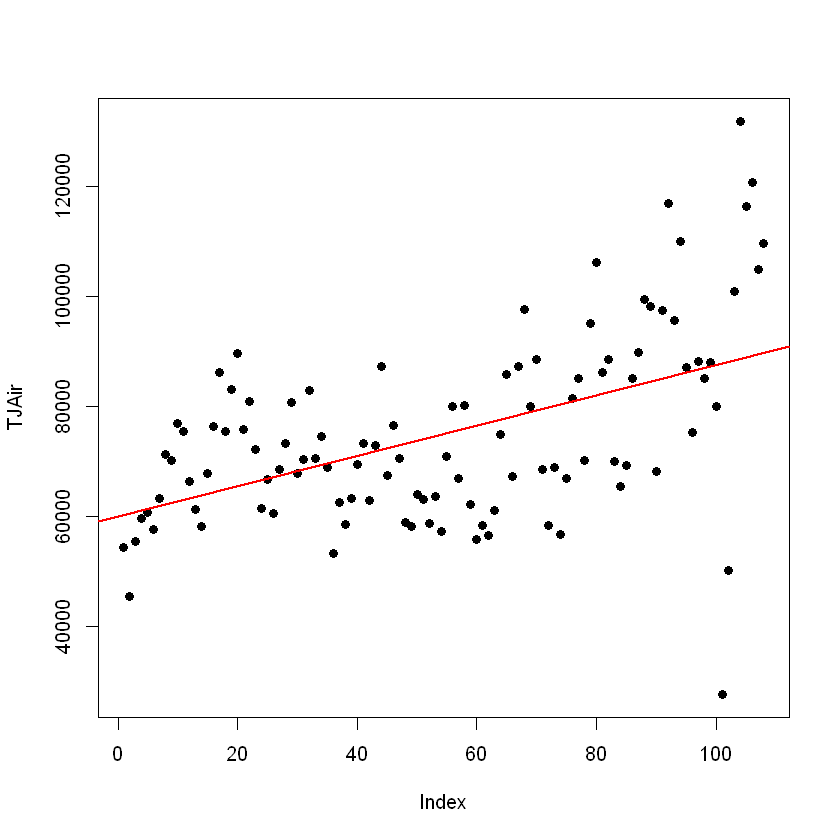

In [107]:
plot(TJAir,pch=19)
abline(lm(y~x,data=df),lwd=2,lty=1,col="red")

(从可视化看，把曲线变成散点图给人一种更强的关系的感觉，这是人的模式bias吗)

既然斜率以及模型显著，某种意义上说可以说存在趋势。技术上说，任何线性模型的确成立时，$\hat{\beta_1} \sim N(\beta_1,Var(\hat{\beta_1}))$。
我们特别考虑满足约束$\beta_1=0$的所有模型。所有这样的模型的的$\hat{\beta_1}$的分布都是一样的（我们做了一些处理得到斜率t检验），
我们可以利用类似非参数检验的思想检验是否$\hat{]beta_1}$的实现值在假设得出的分布显得过于极端，
从而拒绝模型是使得$\beta_1=0$那一族里，当然它“实际”在线性模型类中的哪一族，是否根本不是线性模型生成的我们不可能知道。

在此处，我们假设了各点服从零均值独立同分布正态分布后。就得出了统计上拒绝了它是满足条件的线性模型类中的$\beta_1=0$那一类的命题。
至于这是不是可以解读为“有趋势”，我只能说看上去有那么一些关系。

回归的方法有点模棱两可且也许假设过多，我们下面的Cox-stuart检验则看起来更模棱两可，不过假设宽松了不少。

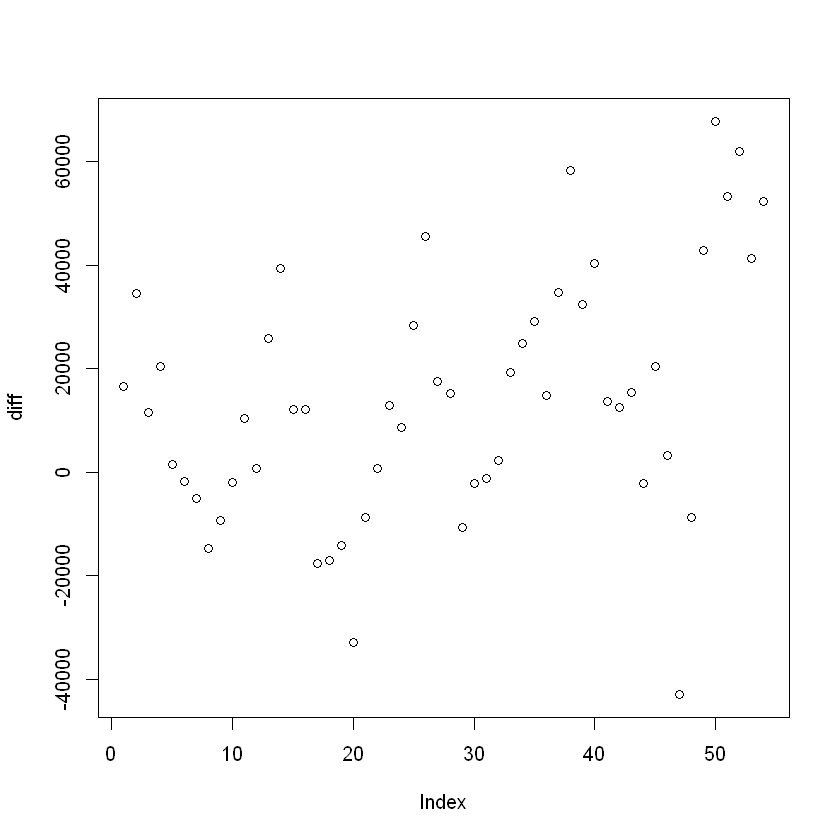

In [109]:
diff <- TJAir[55:108]-TJAir[1:54]
plot(diff)

In [110]:
pbinom(sum(diff<0),length(diff),0.5)

[1] 0.001919133

也就是说，我们单纯把数据分成两半匹配求差，然后看符号数是否服从二项分布。这么做的原假设可以是每个这样的对如何取是对称随机的。
而备择假设也许是是不对称随机的（然而既然使用二项分布，就不能包含一些随时间越来越大之类的假设。虽然该假设也可以用这个统计量检验
，但是却无法与前半段出自一个总体后半段出自一个只是均值更高的总体区分开来。）

## 游程检验

一个随机的0,1生成过程出现的游程（run），即全为0或全为1组成的段，的数量是统计量。在某种意义的随机假设下，该统计量服从特定分布。
注意这个检验有点像之前只考虑秩信息，丢掉了分类原因信息且因此功效太低而被舍弃的那个检验。但这里是故意这么做的，这样就可以控制
0,1本身出现概率而不是仅仅检验0.5的情况。比如说，不同概率值的伯努利过程应该在游程检验上一致地接受原假设，而在类似wilcoxon秩和检验
上时则会在偏离0.5时拒绝，当然这种行为是不是我们想要的完全要看情况。

给定0出现的次数$m$，1出现的次数$n$后，检验统计量，游程数R服从渐进正态分布且有以下关系:

$$
Z = \frac{R - \mu_R}{\sigma_R} = \frac{R-(\frac{2mn}{m+n}+1)}{\sqrt{ \frac{2mn(2mn-m-n)}{(m+n)^2(m+n-1)}  }} \to N(0,1)
$$

In [111]:
run01 <- c(0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,1,1,1,0,0)

In [160]:
run.Z <- function(R,m,n){
    up <- R - (2*m*n)/(m+n) - 1
    down <- sqrt( (2*m*n*(2*m*n - m - n))/((m+n)^2*(m+n-1)) )
    return(up/down)
}

In [163]:
run.n <- function(seq){
    n <- 1
    last <- seq[1]
    for(item in seq[2:length(seq)]){
        if(item != last){
            n <- n + 1
            last <- item
        }
    }
    return(n)
}

run.test <- function(seq,lower.tail=TRUE){
    pnorm(run.Z(run.n(seq),sum(seq==0),sum(seq==1)), lower.tail = lower.tail)
}

In [116]:
run.n(run01)

[1] 5

In [157]:
run.Z(run.n(run01),sum(run01==0),sum(run01==1))

[1] -3.174386

In [169]:
pnorm(run.Z(run.n(run01),sum(run01==0),sum(run01==1)))

[1] 0.0007507685

In [150]:
run.n(run01)

[1] 5

In [151]:
sum(run01==0)

[1] 13

In [152]:
sum(run01==1)

[1] 10

In [153]:
run.Z(run.n(run01),sum(run01==0),sum(run01==1))

[1] -3.174386

In [177]:
run.test(run01)

[1] 0.0007507685

如果能转化成二分类，都可以利用游程检验，如类似符号检验用一个分隔点把数分成两类（如就用样本中位数。直观上看虽然游程检验自带控制出现率，
但0.5出现率依然是“最有效的”，只要考虑到全是1或0显然无法得出任何结论）。

In [131]:
run02 <- c(12.27, 9.92, 10.81, 11.79, 11.87, 10.90, 11.22, 10.80, 10.33, 9.30, 9.81, 8.85,
           9.32,  8.67, 9.32, 9.53, 9.58, 8.94, 7.89, 10.77)

In [161]:
run.test((sign(run02 - median(run02))+1)/2)  * 2 # two side approx

[1] 0.001501537

最后我们看看那个打了半天的`TJAir`数据的邻期增长下降是不是随机的。

In [164]:
diff2 <- (sign(TJAir[2:length(TJAir)] - TJAir[1:length(TJAir)-1]) + 1)/2
diff2

[1] 0 1 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0
 [38] 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 0 1 0 1
 [75] 1 1 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1

In [172]:
sum(diff2 == 0)

[1] 48

In [173]:
sum(diff2 == 1)

[1] 59

In [174]:
run.test(diff2)

[1] 0.9971267

In [176]:
run.test(diff2,lower.tail=FALSE)

[1] 0.002873323

看起来游程比随机假设下偏大，所以有多了以后继续多，少了以后继续少的倾向。